# Problema

**Tipo de Declaração de Problema: Segmentação de Clientes: Agrupamento**

**Descrição do Contexto do Problema:** Uma loja online sediada no Reino Unido capturou os dados de vendas de diferentes produtos ao longo de um ano (novembro de 2016 a dezembro de 2017). A organização vende presentes principalmente na plataforma online. Os clientes que fazem uma compra consomem diretamente para si mesmos. Existem pequenos negócios que compram em grande quantidade e vendem para outros clientes por meio do canal de varejo.

**Objetivo do Projeto:** Encontrar clientes significativos para o negócio que fazem compras elevadas de seus produtos favoritos. A organização deseja implementar um programa de fidelidade para os clientes de alto valor após a identificação dos segmentos.

**Descrição do Conjunto de Dados:** Este é um conjunto de dados transnacional que contém todas as transações ocorridas entre novembro de 2016 e dezembro de 2017 para uma loja online sediada no Reino Unido.

**Descrição dos Atributos:**
- `InvoiceNo`: Número da fatura (um número integral de 6 dígitos atribuído exclusivamente a cada transação)
- `StockCode`: Código do produto (item)
- `Description`: Nome do produto (item)
- `Quantity`: As quantidades de cada produto (item) por transação
- `InvoiceDate`: O dia em que cada transação foi gerada
- `UnitPrice`: Preço unitário (preço do produto por unidade)
- `CustomerID`: Número do cliente (ID único atribuído a cada cliente)
- `Country`: Nome do país (o nome do país onde cada cliente reside)

**Definição de Clientes de Alto Valor [HVC]:** [Link para a definição](https://nectarom.com/2017/02/24/high-value-customers-high-value-results/#:~:text=High%2Dvalue%20customers%20are%20those,in%20times%20of%20financial%20duress).

**Com Base no Objetivo de Negócios:** Minha escolha é ir para a técnica de agrupamento Hierárquico ou EM, pois é mais robusta para este conjunto de dados. As análises abaixo são uma visão subjetiva própria; posso estar equivocado em primeiro lugar e adoraria receber feedback e aprender com você.

# Planejamento da Solução

 **Input - Entrada**

**O problema de negócio**

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 2 anos ( Nov 2015 to Dec 2017 )

**Output - Saída**

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

**Tasks - Processo**

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
             
             
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

 # Imports 

In [1]:
import pandas as pd
import numpy  as np


import matplotlib.pyplot as plt
import seaborn           as sns

from   matplotlib.ticker import FuncFormatter

from   scipy             import stats

import os
import random

In [2]:
# Changing dir to start of project directory
os.chdir('C:\\Users\\joaov\\Documents\\ComunidadeDS\\project_customer_clustering\\')

# Carregando dados

In [3]:
df0 = pd.read_csv('data/raw/Ecommerce.csv', encoding='unicode_escape', usecols=list(np.arange(0,8)))

In [4]:
df0 = df0.assign(
            #InvoiceNo = pd.to_numeric(df0['InvoiceNo'], errors='coerce'),
            InvoiceDate = pd.to_datetime(df0['InvoiceDate'], format='%d-%b-%y')
            ,TotalValue  = lambda x: x['Quantity'] * x['UnitPrice']
            #,CustomerID  = lambda x: x['CustomerID'].astype(np.int64)
                )

# Análise descritiva

## Geral

In [5]:
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,20.34


In [6]:
df0.dtypes    

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalValue            float64
dtype: object

**Quão grande é o Dataset ?**

In [7]:
print(' The dataset has {} rows'
      ' and {} columns.'
      .format(df0.shape[0],df0.shape[1]))

 The dataset has 541909 rows and 9 columns.


**Qual a porcentagem de dados nulos por coluna ?**

In [8]:
round( ( df0.isna().sum() / df0.shape[0] ) * 100
      ,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
TotalValue      0.00
dtype: float64

**Informações gerais por coluna**

In [9]:
df0.describe(include='all')

C:\Users\joaov\AppData\Local\Temp\ipykernel_17556\4066155592.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df0.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,541909.000000
unique,25900,4070,4223,NaN,305,NaN,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2017-12-03 00:00:00,NaN,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478,NaN
first,NaN,NaN,NaN,NaN,2016-11-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-12-07 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,17.987795
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,378.810824
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,-168469.600000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,3.400000


1. <span style="font-size:larger;">**InvoiceNo**</span>
    - Contém valores numéricos e poucas ocorrências de Strings ( < 2% ) como por ex. 'C536379'.
    - Mais que 75% das linhas com InvoiceNo não numéricos contêm quantidades negativas
     
    
    
2. <span style="font-size:larger;">**InvoiceDate**</span>
    - Data armazenada em formato de String, necessário conversão para DateTime
    
3. <span style="font-size:larger;">**Quantity**</span>
    - Há um volume grande de vendas com quantidades negativas. 
               
4. <span style="font-size:larger;">**CustomerID**</span>
    - 25% dos valores vazios.


## Análise descritiva univariada

In [10]:
df0.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalValue'],
      dtype='object')

### **InvoiceNo**

In [11]:
print('Há {:.0f} ocorrências de InvoiceNo com letras misturados com números'.format(df0['InvoiceNo'].str.contains(r'[a-zA-Z]').sum()))
print('Há {:.0f} ocorrências de InvoiceNo somente com números'.format(df0['InvoiceNo'].str.match(r'^\d+$').sum()))

print('\n')

print('Há {:.0f} ocorrências únicas de InvoiceNo com letras misturados com números'.format(len(df0['InvoiceNo'][df0['InvoiceNo'].str.contains(r'[a-zA-Z]')].unique())))
print('Há {:.0f} ocorrências únicas de InvoiceNo somente com números'.format(len(df0['InvoiceNo'][df0['InvoiceNo'].str.match(r'^\d+$')].unique())))

Há 9291 ocorrências de InvoiceNo com letras misturados com números
Há 532618 ocorrências de InvoiceNo somente com números


Há 3839 ocorrências únicas de InvoiceNo com letras misturados com números
Há 22061 ocorrências únicas de InvoiceNo somente com números


### **Description e StockCode**

<span style="font-size:25px;"> Cada StockCode só tem um Description?<span>
         

<span style="font-size:30px;">Não, existem 650 StockCodes com 2 ou mais descrições<span>

In [12]:
aux = (df0.dropna(subset=['Description'])
       .groupby('StockCode')
       ['Description']
       .nunique())

len(aux[aux > 1])

650

<span style="font-size:30px;">50 exemplos aleatórios de StockCodes com mais de uma descrição de produto<span>

In [13]:
aux = df0[['StockCode','Description']].drop_duplicates()
aux2 = {}
for i in aux['StockCode'].unique():
    if len(aux[aux.StockCode == i].Description.unique()) > 1:
        aux2[i] = list(aux[aux.StockCode == i].Description.unique())

random.seed(42)
random.setstate(random.getstate())
random.sample(list(aux2.items()), 30)

[('23536', ['VILLAGE SHOW WALL ART', 'WALL ART VILLAGE SHOW ']),
 ('22966', ['GINGERBREAD MAN COOKIE CUTTER', nan]),
 ('22922', ['FRIDGE MAGNETS US DINER ASSORTED', 'sold as set on dotcom']),
 ('79000', ['MOROCCAN TEA GLASS', nan]),
 ('20832', ['RED FLOCK LOVE HEART PHOTO FRAME', 'check']),
 ('85232D', ['SET/3 DECOUPAGE STACKING TINS', 'mix up with c', nan]),
 ('35610A', ['PINK CHRISTMAS FLOCK DROPLET ', 'thrown away']),
 ('84569B', ['PACK 3 FIRE ENGINE/CAR PATCHES', nan]),
 ('85145', ['JARDIN ETCHED GLASS LARGE BELL JAR', nan]),
 ('22024', ['RAINY LADIES BIRTHDAY CARD', nan]),
 ('23212',
  ['HEART WREATH DECORATION WITH BELL', 'PAINTED HEART WREATH WITH BELL']),
 ('85086A', ['CANDY SPOT HEART DECORATION', nan]),
 ('22128', ['PARTY CONES CANDY ASSORTED', 'sold as set on dotcom']),
 ('21484', ['CHICK GREY HOT WATER BOTTLE', nan]),
 ('21664', ['RIDGED GLASS STORAGE JAR CREAM LID', nan]),
 ('84559B', ['3D SHEET OF CAT STICKERS', nan]),
 ('21918', ['SET 12 KIDS COLOUR  CHALK STICKS', nan])

* <span style="font-size:larger;">Há StockCodes com mais de uma descrição por diferentes razões</span>
    * <span style="font-size:larger;">Produtos similares mas com nomes diferentes. Ex.: 23536</span>
    * <span style="font-size:larger;">Valores preenchidos e nulos dentro de um mesmo StockCode Ex.: 22024</span>
    * <span style="font-size:larger;">Produtos com descrições negativas sobre o produto Ex.: 22128</span>


### Quantity

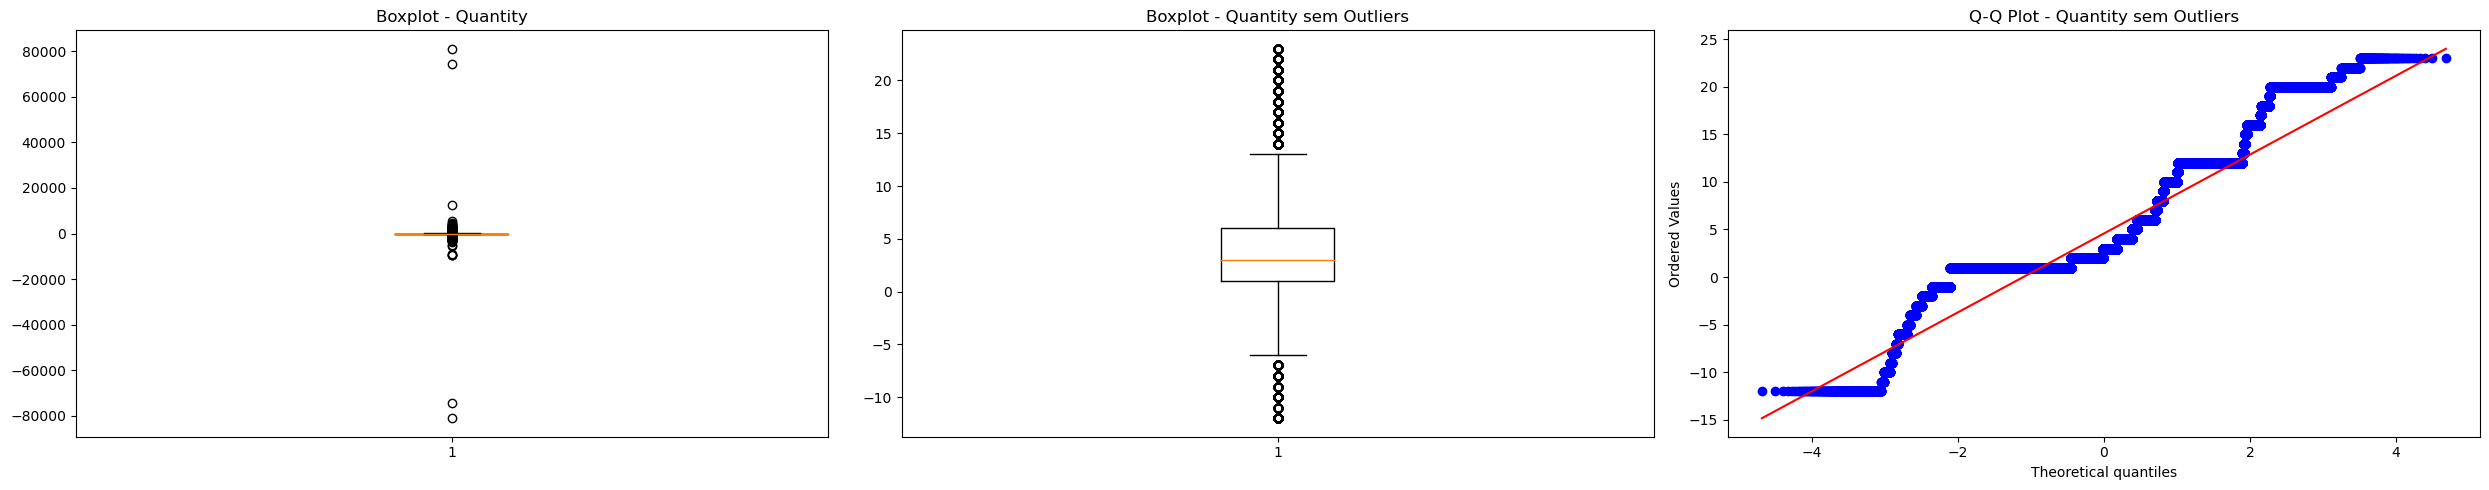

In [51]:
q25 = np.percentile(df0.Quantity, 25)
q75 = np.percentile(df0.Quantity, 75)
iqr = q75 - q25
aux = (df0[
            (df0.Quantity > q25 - 1.5 * iqr)
          & (df0.Quantity < q75 + 1.5 * iqr)
          ].Quantity)

fig, ax = plt.subplots(1,3, figsize=(25,5))


ax[0].boxplot(df0.Quantity);
ax[0].set(title='Boxplot - Quantity');

ax[1].boxplot(aux);
ax[1].set(title='Boxplot - Quantity sem Outliers');

stats.probplot(aux, dist="norm", plot=ax[2])
ax[2].set(title='Q-Q Plot - Quantity sem Outliers');

plt.tight_layout()

### Unit Price

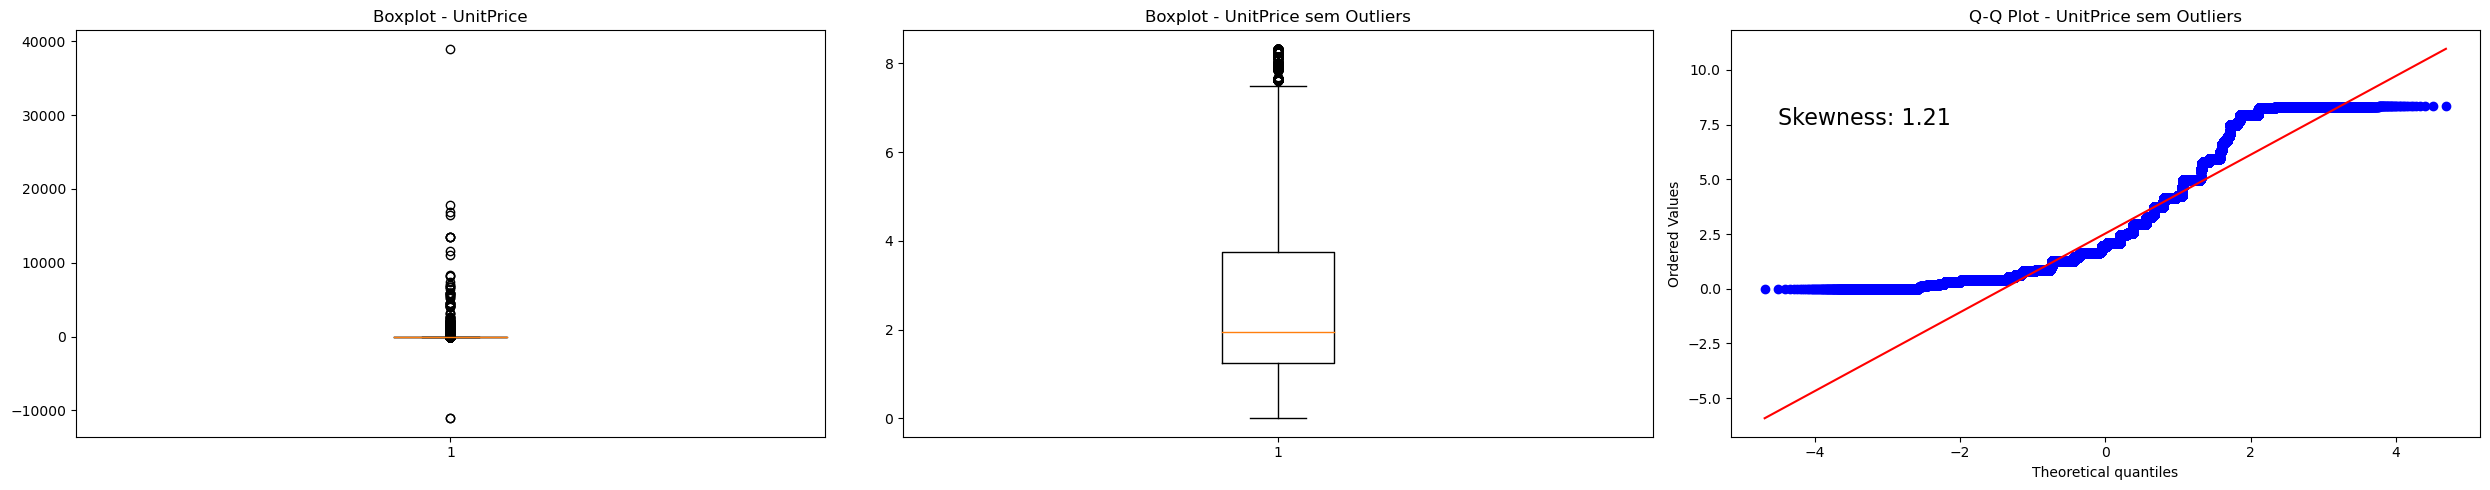

In [77]:
q25 = np.percentile(df0.UnitPrice, 25)
q75 = np.percentile(df0.UnitPrice, 75)
iqr = q75 - q25
aux = (df0[
            (df0.UnitPrice > q25 - 1.5 * iqr)
          & (df0.UnitPrice < q75 + 1.5 * iqr)
          ].UnitPrice)

fig, ax = plt.subplots(1,3, figsize=(25,5))


ax[0].boxplot(df0.UnitPrice);
ax[0].set(title='Boxplot - UnitPrice');

ax[1].boxplot(aux);
ax[1].set(title='Boxplot - UnitPrice sem Outliers');

stats.probplot(aux, dist="norm", plot=ax[2])
ax[2].set(title='Q-Q Plot - UnitPrice sem Outliers');
ax[2].annotate('Skewness: {:.2f}'.format(stats.skew(aux))
               ,xy=(-4.5, 7.5)
               ,fontsize=16)

plt.tight_layout()

<span style="font-size:30px;">Forte skew positivo nos preços de unidades, desviando da normalidade<span>

### Country

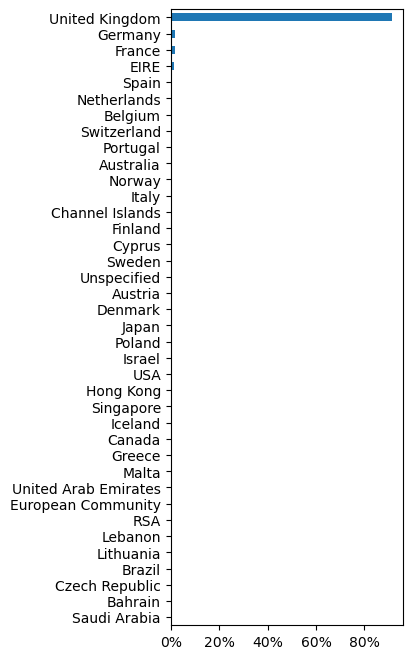

In [67]:
plt.figure(figsize=(3,8))
ax = df0.Country.value_counts(normalize=True, ascending=True).plot(kind='barh');
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

## Análise descritiva multivariada

### Quais os clientes responsáveis por maior parte do faturamento?

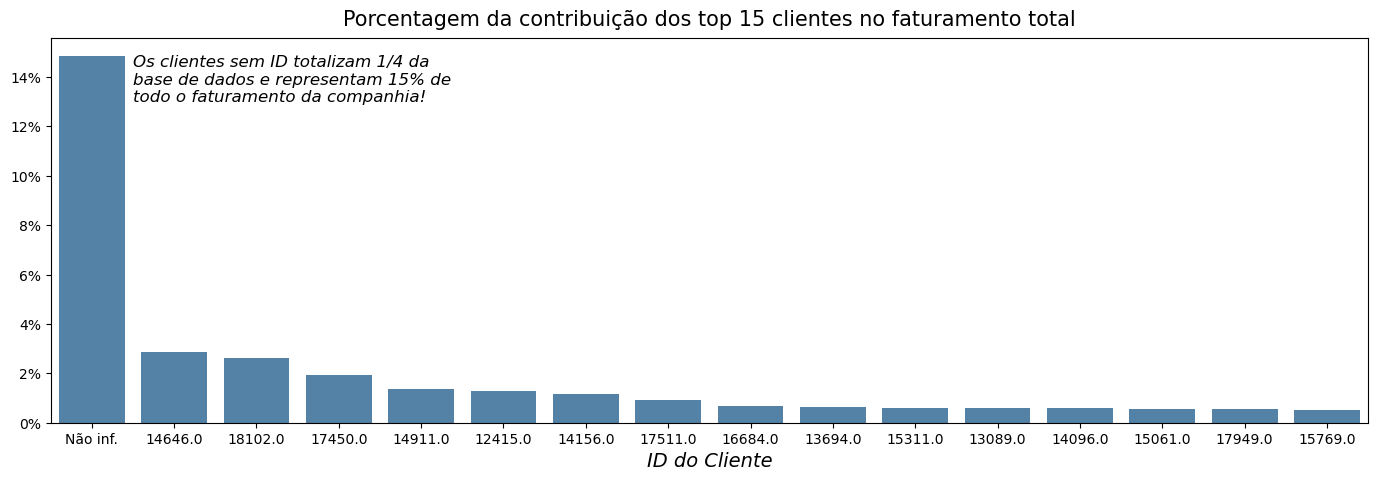

In [34]:
aux = (df0.groupby('CustomerID', as_index=False, dropna=False)
         ['TotalValue']
         .sum()
         .fillna('Não inf.')
         .assign(TotalValuePerc = lambda x: x['TotalValue'] / x['TotalValue'].sum())
         .sort_values(by='TotalValue', ascending=False)
         .reset_index(drop=False)
         .loc[:15,['CustomerID','TotalValuePerc']]
    )

# Criando plot
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(data=aux,
            x='CustomerID'
            ,y='TotalValuePerc'
            ,order=aux['CustomerID']
            ,color='steelblue'
            );

# Editando plot
ax.set_title('Porcentagem da contribuição dos top 15 clientes no faturamento total', fontsize=15, fontfamily='sans-serif', y=1.01);
ax.set_xlabel('ID do Cliente', fontsize=14, fontfamily='sans-serif', fontstyle='italic');
ax.set_ylabel('');
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.annotate('Os clientes sem ID totalizam 1/4 da\n'
            'base de dados e representam 15% de\n'
            'todo o faturamento da companhia!',
            xy= (0.5, .13),
            fontsize=12,
            fontstyle='italic');

plt.savefig('reports/figures/Contribuicao_Perc_Clientes_Faturamento.png', dpi=200, bbox_inches='tight')

### <span style="font-size:25px;"> Quais são os produtos mais vendidos e estornados?<span>
         

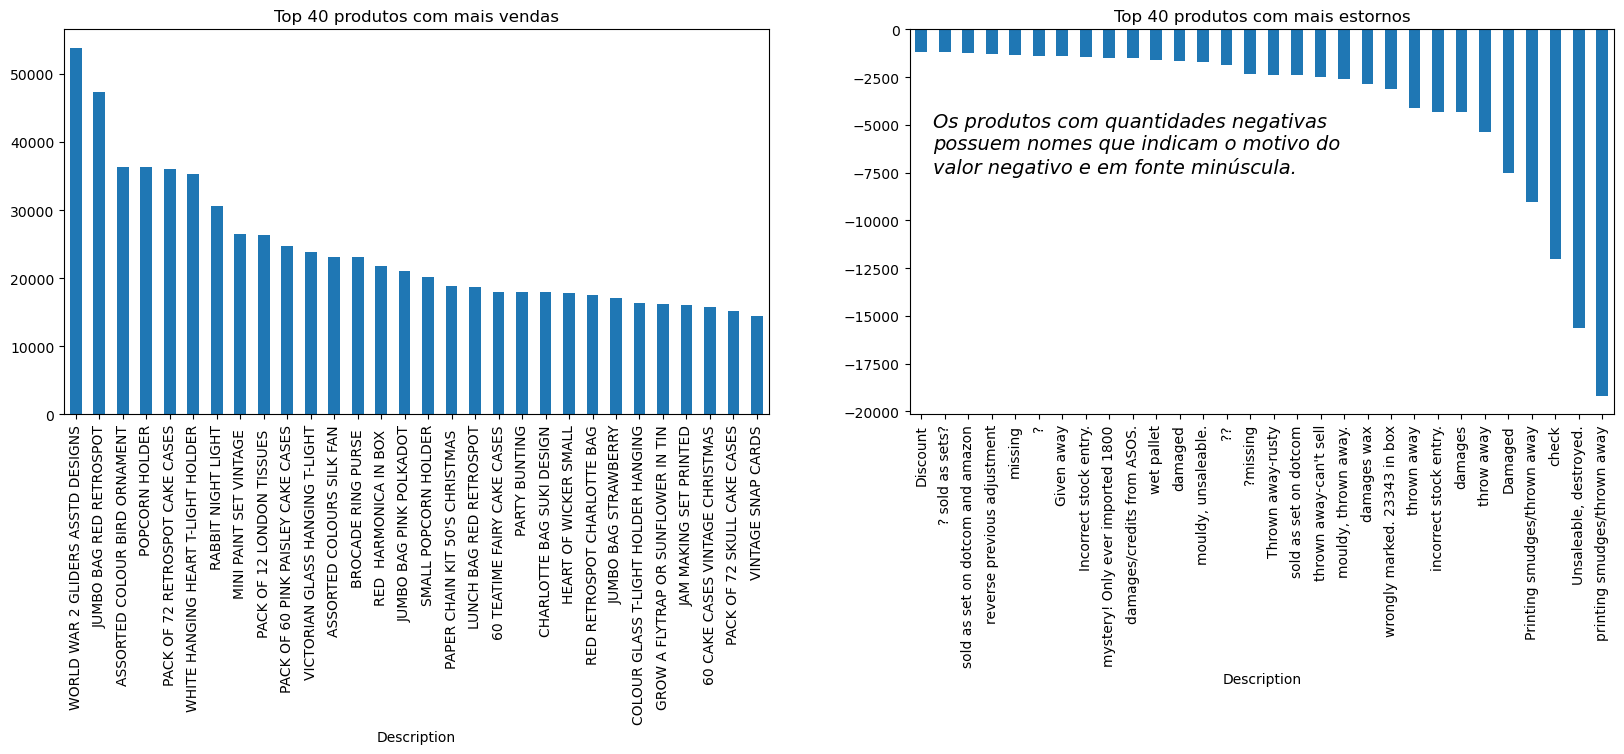

In [99]:
fig, ax = plt.subplots(1,2, figsize=(20,5)) 

#plt.subplot(2,1,1)
(df0.groupby('Description', as_index=False)
    ['Quantity']
    .sum()
    .sort_values('Quantity', ascending=False, ignore_index=True)
    .set_index('Description')
    .iloc[:30,:]
    .plot(kind='bar', ax=ax[0], title='Top 30 produtos com mais vendas', legend=None));

(df0.groupby('Description', as_index=False)
    ['Quantity']
    .sum()
    .sort_values('Quantity', ascending=False, ignore_index=True)
    .set_index('Description')
    .iloc[-30:,:]
    .plot(kind='bar', ax=ax[1],  title='Top 30 produtos com mais estornos', legend=None));
ax[1].annotate('Os produtos com quantidades negativas\n'
                'possuem nomes que indicam o motivo do\n'
                'valor negativo e em fonte minúscula.',
                xy= (0.5, -7500),
                fontsize=14,
                fontstyle='italic');

# Treating data

In [ ]:
df1.head()

# Analyze